In [18]:
from matplotlib import pyplot as plt
import numpy as np

# LOAD DATA 

In [19]:
with open('LAB1_25.TXT', 'r') as file:
    data = np.array([list(map(float, line.split())) for line in file])
time = data[:, 0] * 10**-6

# TASK 1

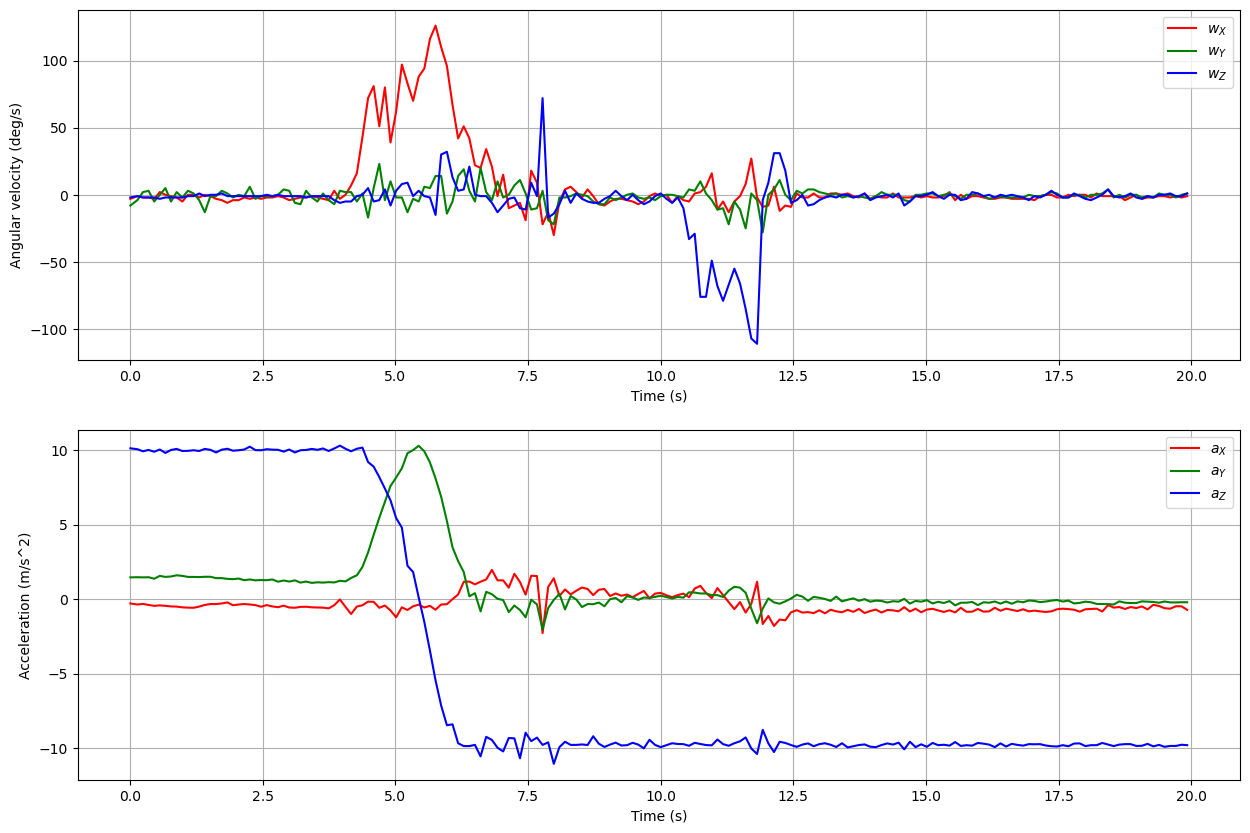

In [20]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
#accelerometer data(hundredths of meters per second squared)
acceleration = data[:, 1:4] * 0.01
#gyro-rate (tenths of degrees per second)
angular_velocity = data[:, 4:7] * 1

plt.plot(time,angular_velocity[:, 0], color='red')
plt.plot(time,angular_velocity[:, 1], color='green')
plt.plot(time,angular_velocity[:, 2], color='blue')
#Use latex for labels
plt.xlabel('Time (s)')
plt.ylabel('Angular velocity (deg/s)')
plt.legend(['$w_X$', '$w_Y$', '$w_Z$'])


plt.grid()
plt.subplot(2, 1, 2)
plt.grid()
plt.plot(time,acceleration[:, 0], color='red')
plt.plot(time,acceleration[:, 1], color='green')
plt.plot(time,acceleration[:, 2], color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend(['$a_X$', '$a_Y$', '$a_Z$'])
plt.show()

In [21]:
#Measure the variance of the data
static_arm_time = time > 15
var_ang_vel = np.var(angular_velocity[static_arm_time], axis=0)
angular_velocity = np.where(angular_velocity < 3*var_ang_vel, 0, angular_velocity)
var_acceleration = np.var(acceleration[static_arm_time], axis=0)
acceleration = np.where(acceleration < 3*var_acceleration, 0, acceleration)


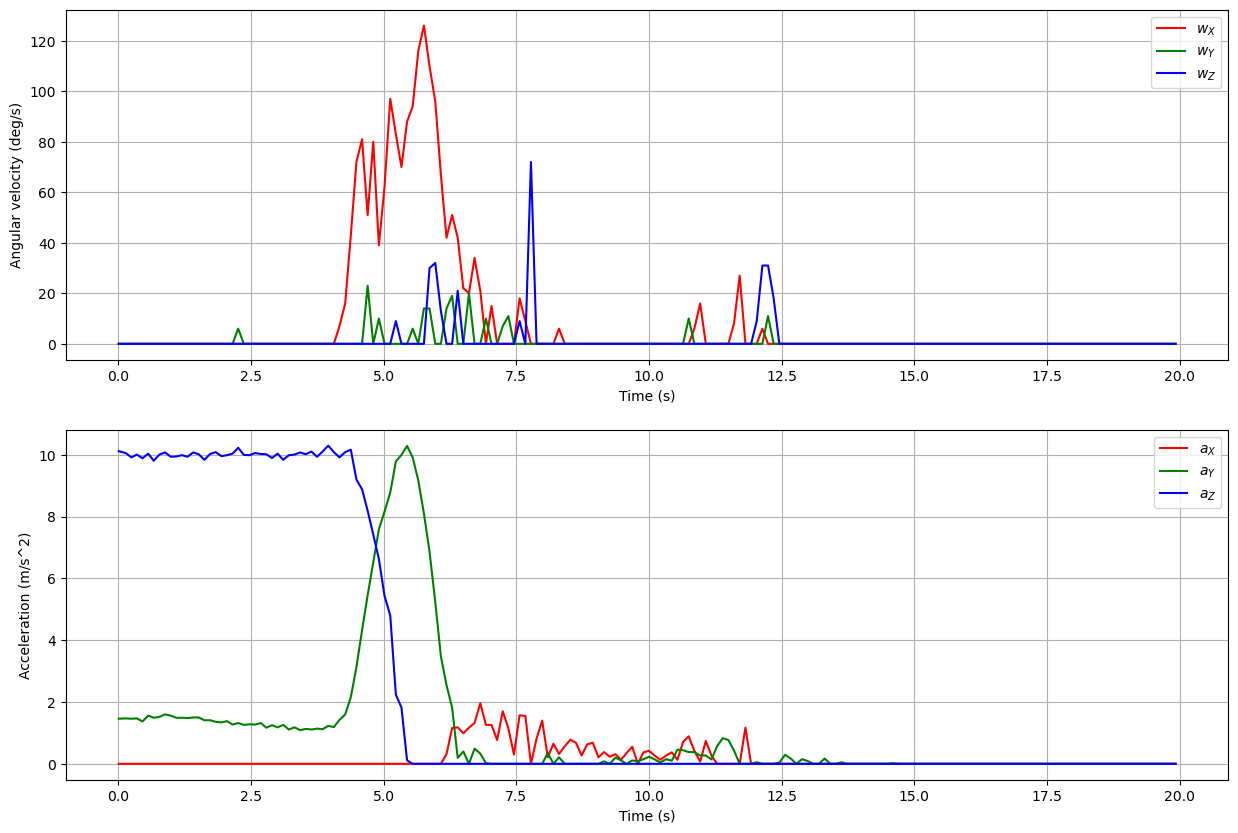

In [26]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)

plt.plot(time,angular_velocity[:, 0], color='red')
plt.plot(time,angular_velocity[:, 1], color='green')
plt.plot(time,angular_velocity[:, 2], color='blue')
#Use latex for labels
plt.xlabel('Time (s)')
plt.ylabel('Angular velocity (deg/s)')
plt.legend(['$w_X$', '$w_Y$', '$w_Z$'])


plt.grid()
plt.subplot(2, 1, 2)
plt.grid()
plt.plot(time,acceleration[:, 0], color='red')
plt.plot(time,acceleration[:, 1], color='green')
plt.plot(time,acceleration[:, 2], color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend(['$a_X$', '$a_Y$', '$a_Z$'])
plt.show()

# TASK 2

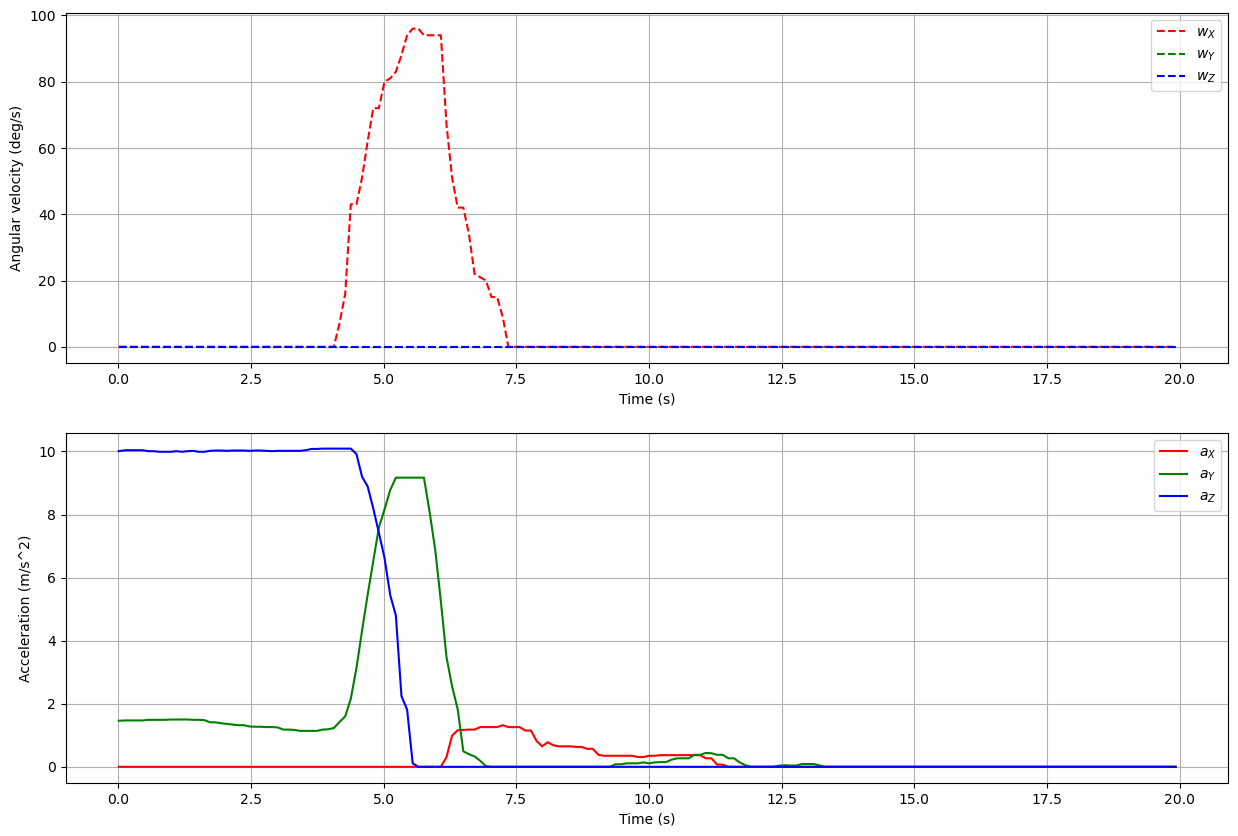

In [22]:
from scipy.ndimage import median_filter

def keep_only_moving(data, axis_moving_data):
    num_points, num_axis = data.shape
    for i in range(num_points):
        data_point = data[i]
        axis_moving = axis_moving_data[i]
        for j in range(num_axis):
            if j != axis_moving:
                data_point[j] = 0
    return data

filtered_ang_vel = median_filter(angular_velocity, size=(10,1))
filtered_acceleration = median_filter(acceleration, size=(10,1))
axis_moving = np.argmax(filtered_ang_vel, axis=1)
filtered_ang_vel_max = keep_only_moving(filtered_ang_vel, axis_moving)
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
# plt.plot(time,filtered_ang_vel[:, 0], color='red')
# plt.plot(time,filtered_ang_vel[:, 1], color='green')
# plt.plot(time,filtered_ang_vel[:, 2], color = 'blue')
plt.plot(time,filtered_ang_vel_max[:, 0], color='red', linestyle='--')
plt.plot(time,filtered_ang_vel_max[:, 1], color='green', linestyle='--')
plt.plot(time,filtered_ang_vel_max[:, 2], color='blue', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Angular velocity (deg/s)')
plt.legend(['$w_X$', '$w_Y$', '$w_Z$'])
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(time,filtered_acceleration[:, 0], color='red')
plt.plot(time,filtered_acceleration[:, 1], color='green')
plt.plot(time,filtered_acceleration[:, 2], color = 'blue')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend(['$a_X$', '$a_Y$', '$a_Z$'])
plt.grid()
plt.show()


In [24]:
Initial_roll = 0
for i in range(39, 70):
    dt = time[i] - time[i-1]
    Initial_roll += filtered_ang_vel[i, 0] * dt
    print(f'{Initial_roll:=}, {i=:}, {time[i]=:}, {filtered_ang_vel[i, 0]=:}, {dt=:}')
print(Initial_roll)

0.7403760000000021, i=39, time[i]=4.165164, filtered_ang_vel[i, 0]=7.0, dt=0.1057680000000003
2.4736240000000054, i=40, time[i]=4.273492, filtered_ang_vel[i, 0]=16.0, dt=0.1083280000000002
7.019068000000002, i=41, time[i]=4.3792, filtered_ang_vel[i, 0]=43.0, dt=0.10570799999999991
11.56760800000001, i=42, time[i]=4.48498, filtered_ang_vel[i, 0]=43.0, dt=0.10578000000000021
16.962592000000004, i=43, time[i]=4.590764, filtered_ang_vel[i, 0]=51.0, dt=0.10578399999999988
23.521447999999978, i=44, time[i]=4.696552, filtered_ang_vel[i, 0]=62.0, dt=0.10578799999999955
31.137320000000017, i=45, time[i]=4.802328, filtered_ang_vel[i, 0]=72.0, dt=0.10577600000000054
38.75347999999997, i=46, time[i]=4.9081079999999995, filtered_ang_vel[i, 0]=72.0, dt=0.10577999999999932
47.215879999999984, i=47, time[i]=5.013888, filtered_ang_vel[i, 0]=80.0, dt=0.10578000000000021
55.99304000000001, i=48, time[i]=5.122248, filtered_ang_vel[i, 0]=81.0, dt=0.10836000000000023
64.77178399999995, i=49, time[i]=5.22801

In [15]:
import pandas as pd
# Create a time series
ts = pd.DataFrame(angular_velocity)
filtered_mean_angular_velocity_ts.rolling(window=5).mean()

NameError: name 'filtered_mean_angular_velocity_ts' is not defined

In [ ]:


# Compute a rolling average with a window of size 3
rolling_mean = ts.rolling(window=3).mean()
filtered_ang_vel = me(angular_velocity, size=(10,1))
filtered_acceleration = median_filter(acceleration, size=(10,1))
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(time,filtered_ang_vel[:, 0], color='red')
plt.plot(time,filtered_ang_vel[:, 1], color='green')
plt.plot(time,filtered_ang_vel[:, 2], color = 'blue')
plt.xlabel('Time (s)')
plt.ylabel('Angular velocity (deg/s)')
plt.legend(['$w_X$', '$w_Y$', '$w_Z$'])
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(time,filtered_acceleration[:, 0], color='red')
plt.plot(time,filtered_acceleration[:, 1], color='green')
plt.plot(time,filtered_acceleration[:, 2], color = 'blue')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend(['$a_X$', '$a_Y$', '$a_Z$'])
plt.grid()
plt.show()


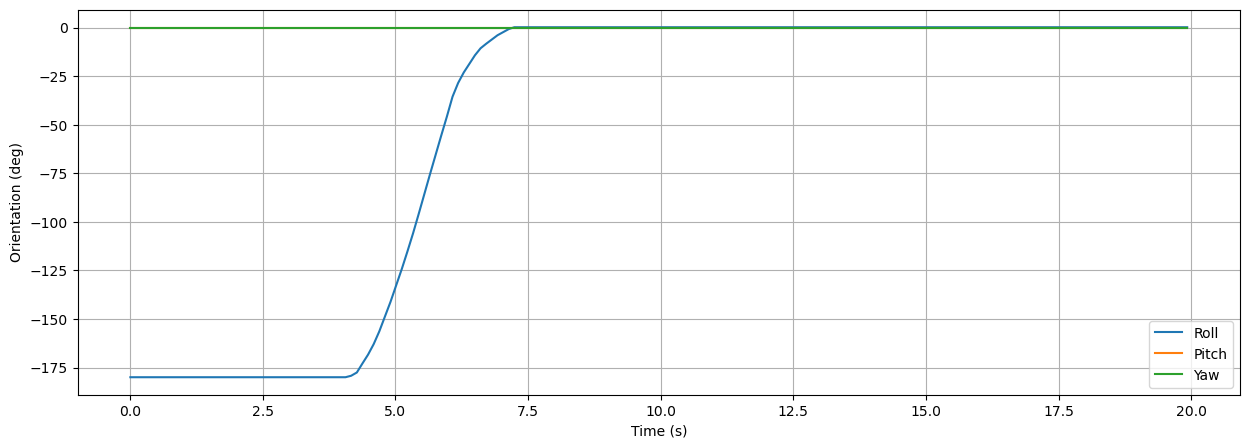

In [23]:
def normalize_angle(angle):
    for i in range(len(angle[-1])):
        angle[-1][i] = (angle[-1][i] + 180) % 360 - 180
    return angle

orientation = [[180,0,0]] #Initial orientation extracted by looking at the acceleration data (measuring the gravity acceleration at the beginning)
normalize_angle(orientation)
for i,ang_vel in enumerate(filtered_ang_vel_max[1:]):
    dt = time[i] - time[i-1]
    orientation.append(orientation[-1] + ang_vel * dt)
    normalize_angle(orientation)

plt.figure(figsize=(15, 5))
plt.plot(time, orientation)
plt.xlabel('Time (s)')
plt.ylabel('Orientation (deg)')
plt.legend(['Roll', 'Pitch', 'Yaw'])
plt.grid()

# Trajetória

In [ ]:
def plot_trajectory(points):
    """
    Plots a 3D trajectory given a set of points.

    Parameters:
        points (list of tuples): Each tuple contains (x, y, z) coordinates.
    """
    # Create a 3D plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the trajectory
    ax.plot(points[:,0], points[:,1], points[:,2], label="Trajectory")
    ax.scatter(points[0,0], points[0,1], points[0,2], color="green", label="Start", s=50)  # Start point
    ax.scatter(points[-1,0], points[-1,1], points[-1,2], color="red", label="End", s=50)   # End point

    # Labels and legend
    ax.set_xlabel("X Position (m)")
    ax.set_ylabel("Y Position (m)")
    ax.set_zlabel("Z Position (m)")
    ax.set_title("3D Trajectory")
    ax.legend()

    plt.show()

def plot_circle(points):
    # Create a 3D plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    radius = 1
    # Plot the trajectory
    ax.plot(radius * np.sin(points[:,0])*np.cos(points[:,1]), np.sin(points[:,0])*np.sin(points[:,1]), np.cos(points[:,0]), label="Trajectory")
    ax.scatter(radius * np.sin(points[0,0])*np.cos(points[0,1]), np.sin(points[0,0])*np.sin(points[0,1]), np.cos(points[0,0]), color="green", label="Start", s=50)  # Start point
    ax.scatter(radius * np.sin(points[-1,0])*np.cos(points[-1,1]), np.sin(points[-1,0])*np.sin(points[-1,1]), np.cos(points[-1,0]), color="red", label="End", s=50)   # End point

    # Labels and legend
    ax.set_xlabel("X Position (m)")
    ax.set_ylabel("Y Position (m)")
    ax.set_zlabel("Z Position (m)")
    ax.set_title("3D Trajectory")
    ax.legend()
    
    plt.show()
    return radius * np.sin(points[:,0])*np.cos(points[:,1]), np.sin(points[:,0])*np.sin(points[:,1]), np.cos(points[:,0])

# TASK 3

In [ ]:
vel_prev = filtered_acceleration[0] * time[0]
position = [vel_prev*time[0]]
t_prev = 0
for t, ac in zip(time[1:], filtered_acceleration[1:]):
    dt = t - t_prev
    vel = vel_prev + ac*dt
    position.append(position[-1] + vel*dt)
    
    vel_prev = vel
    t_prev = t
    
    
position = np.array(position)
plt.figure(figsize=(15, 5))
plt.plot(time, position[:,0], color='red')
plt.plot(time,position[:,1], color='green')
plt.plot(time,position[:, 2], color='blue')
plt.legend(['$x$', '$y$', '$z$'])
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.grid()


In [ ]:
# Plot the trajectory
plot_trajectory(position)

# TASK 4

In [ ]:
#v1 = (teta1- teta0)/(t1-t0)

angvel_prev = filtered_ang_vel[0] * time[0]
positionAng = [angvel_prev*time[0]]
t_prev = 0
for t, av in zip(time[1:], filtered_ang_vel[1:]):
    dt = t - t_prev
    positionAngAux = positionAng[-1]+av*dt
    if positionAngAux[0] > 360:
        positionAngAux[0]-=360
    if positionAngAux[1] > 360:
        positionAngAux[1]-=360
    if positionAngAux[2] > 360:
        positionAngAux[2]-=360
    if positionAngAux[0] < -360:
        positionAngAux[0]+=360
    if positionAngAux[1] < -360:
        positionAngAux[1]+=360
    if positionAngAux[2] < -360:
        positionAngAux[2]+=360
    positionAng.append(positionAngAux)
    t_prev = t

positionAng = np.array(positionAng)
plt.figure(figsize=(15, 5))
plt.plot(time, positionAng[:,0], color='red')
plt.plot(time,positionAng[:,1], color='green')
plt.plot(time,positionAng[:, 2], color='blue')
plt.legend(['$teta1$', '$teta2$', '$teta3$'])
plt.xlabel('Time (s)')
plt.ylabel('Angle (º)')
plt.grid()

In [ ]:
from math import sqrt
x,y,z = plot_circle(positionAng)
for x1,y1,z1 in zip(x,y,z):
    print(sqrt(x1**2 + y1**2 + z1**2))